In [1]:
from tensorflow.python import keras
keras.__version__ # 케라스 버전 확인

'2.6.0'

In [2]:
# 주택 가격 예측 : 회귀 분석
# 회귀분석 - 연속적인 값을 예측     ex) 과거 기상 데이터를 입력하여 내일의 기온을 예측
# 보스턴 주택 가격 데이터셋 : 1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터로 주택 가격 예측
# 샘플 개수 : 506개(학습용 404개, 검증용 102개)
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) =\
    boston_housing.load_data() # c:/사용자/계정/.keras/datasets 디렉토리에 다운로드됨

65536/57026 [==================================] - 0s 0us/step


In [15]:
print(X_train.shape) # 학습용 404개
print(X_test.shape) # 검증용 102개
print(X_train.shape[1]) # 13개의 변수

(404, 13)
(102, 13)
13


In [4]:
# 독립변수 목록
# 1. Per capita crime rate
# 2. Proportion of residential land zoned for lots over 25,000 square feet
# 3. Proportion of non-retail business acres per town
# 4. Charles River dummy variable(= 1 if tract bounds river; 0 otherwise) 
# 5. Nitric oxides concentration (part per 10 million)
# 6. Average number of rooms per dwelling
# 7. Proportion of owner-occupied units built prior to 1940
# 8. Weighted distances to five Boston employment centres
# 9. Index of accessibility to radial highways
# 10. Full-value property-tax rate per $10,000
# 11. pupil-teacher ratio by town
# 12. 1000*(Bk - 0.63)**2 where Bk is the proportion of Black people by town
# 13. % lower status of the population
# 종속변수 : 주택의 가격(단위 : 1000$)
y_train[0:10] # 주택가격(10,000 ~ 50,000$)

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

<AxesSubplot:>

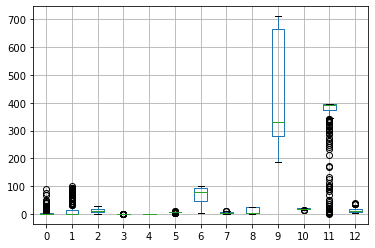

In [7]:
import pandas as pd

pd.DataFrame(X_train).boxplot()

<AxesSubplot:>

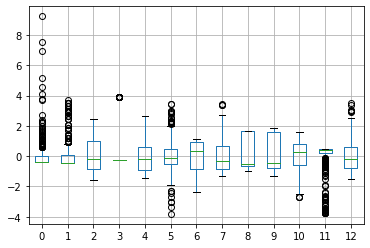

In [8]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() # 평균 0, 표준편차 1로 만드는 스케일러
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
pd.DataFrame(X_train_scaled).boxplot()

In [9]:
# 활성화 함수 : 입력 데이터를 적절하게 처리하여 출력 데이터를 만들어내는 함수
# input data → {activation function} → output data
# 활성화 함수의 종류 : 탄젠트(tanh) 함수, 시그모이드(sigmoid) 함수, ReLU 함수
# ReLU(Rectified Linear Unit) 함수 : 탄젠트 함수나 시그모이드 함수보다 학습시간이 빨라서 최근 선호되고 있다
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model(): # 64개의 노드를 가진 은닉층 2개의 신경망
    model=models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) # 출력층(1개의 노드)
    # 하나의 값을 예측하는 회귀분석의 경우 활성화 함수가 없는 선형층을 사용함
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # mse 손실 함수를 사용하여 컴파일
    # mse(mean squared error) : 평균 제곱 오차, 예측값과 실제값의 거리의 제곱 
    # mae(mean absolute error) : 평균 절대 오차, 예측값과 실제값의 거리의 절댓값 
    return model

In [10]:
model=build_model()
hist=model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1) # 모델 학습

Epoch 1/10
404/404 [==============================] - 5s 6ms/step - loss: 296.9383 - mae: 11.8767
Epoch 2/10
404/404 [==============================] - 1s 4ms/step - loss: 152.0235 - mae: 9.0756
Epoch 3/10
404/404 [==============================] - 1s 3ms/step - loss: 110.2320 - mae: 7.9035
Epoch 4/10
404/404 [==============================] - 1s 3ms/step - loss: 102.9845 - mae: 7.3367
Epoch 5/10
404/404 [==============================] - 1s 4ms/step - loss: 97.4950 - mae: 7.2777
Epoch 6/10
404/404 [==============================] - 1s 4ms/step - loss: 76.5859 - mae: 6.3744
Epoch 7/10
404/404 [==============================] - 1s 4ms/step - loss: 75.0031 - mae: 6.3678
Epoch 8/10
404/404 [==============================] - 2s 4ms/step - loss: 68.5331 - mae: 6.0759
Epoch 9/10
404/404 [==============================] - 2s 4ms/step - loss: 59.8037 - mae: 5.6010
Epoch 10/10
404/404 [==============================] - 2s 4ms/step - loss: 56.5574 - mae: 5.6297


In [11]:
# 검증용 데이터로 모델 평가
mse, mae=model.evaluate(X_test,y_test, verbose=1)
print(mse)
print(mae) # 4567달러 정도 차이가 남

4/4 [==============================] - 0s 3ms/step - loss: 42.5406 - mae: 4.5671
42.54059600830078
4.567092418670654


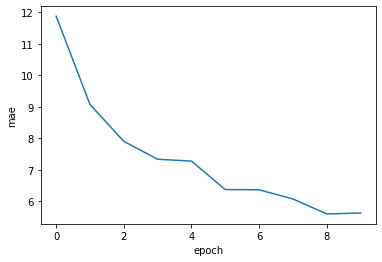

In [12]:
import matplotlib.pyplot as plt

plt.plot(hist.history['mae'])
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
